# imports 

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import nltk
import unicodedata
import re
import wrangle 
from importlib import reload

from wordcloud import WordCloud

# Wrangle
- Load the README data set.

In [59]:
reload(wrangle)

<module 'wrangle' from '/Users/sinao/codeup-data-science/nlp_project/wrangle.py'>

In [60]:
df = wrangle.get_search_csv()


In [61]:
df = wrangle.prep_text(df)

In [62]:
df.head()

,language,lemmatized,word_count
0,JavaScript,install usage game check schedule option date ...,415.0
2,other,readmemd dunk dunk dribbble client,5.0
3,Python,getting started get copy prerequisite hosting ...,355.0
5,JavaScript,nba note blacklisted ip address cors restricti...,566.0
7,Python,nba player movement example usage readmemd nba...,88.0


# Explore
* created function to *flatten* the languages into less categories
    - went from 21 categories down to 6

In [63]:
language_freq = df.language.value_counts()
    
#quick takeaway --> lets combine those with 3 or less into other
#we can then backport the code to the wrangle portion
language_freq.size

5

In [64]:
df.language.value_counts()

Python        73
other         44
R             29
JavaScript    20
HTML          13
Name: language, dtype: int64

## Univariate
- histogram of langauges, 
- value counts of words by langauge ?

<AxesSubplot:>

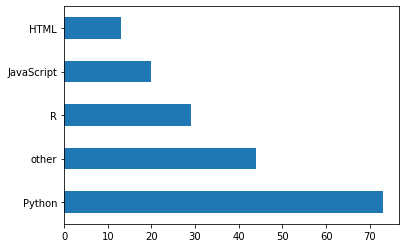

In [65]:
df.language.value_counts().plot.barh()

Create and explore bigrams for the README data.

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 190
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   language    179 non-null    object 
 1   lemmatized  179 non-null    object 
 2   word_count  179 non-null    float64
dtypes: float64(1), object(2)
memory usage: 9.7+ KB


In [67]:
df.language = df.language.str.lower()

In [68]:
df[df.language == 'html'].word_count.count()

13

## Class Creation

In [69]:
df.head(20)

,language,lemmatized,word_count
0,javascript,install usage game check schedule option date ...,415.0
2,other,readmemd dunk dunk dribbble client,5.0
3,python,getting started get copy prerequisite hosting ...,355.0
5,javascript,nba note blacklisted ip address cors restricti...,566.0
7,python,nba player movement example usage readmemd nba...,88.0
8,javascript,reactnativebasketball versioning installation ...,34.0
9,other,feature task demo documentation yeoman generat...,414.0
10,javascript,nbajs table content installation usage example...,80.0
11,html,documentation contributor readmemd basketball ...,44.0
12,python,espn api installing usage getting started api ...,188.0


In [70]:
#created class in order to facilitate bigram and trigram creation
class code_language:
  def __init__(self, words, label:str):
    self.words = words
    self.label = label
    self.unique_to_language = set()

  def whole_words(self): 
    return pd.Series(self.words.split())

  def word_counts(self):
    return pd.Series(self.words.split()).value_counts()

  def unique_words(self):
    return set(pd.Series(self.whole_words().unique()))

  def bigrams(self):
    return pd.Series(list(nltk.bigrams(self.words.split())))

  def trigrams(self):
    return pd.Series(list(nltk.ngrams(self.words.split(), 3)))

  def readme_count(self):
    return df[df.language == self.label].word_count.count()


In [71]:
# this initilizes the class objects. 
html = code_language(words=' '.join(df[df.language == 'html'].lemmatized), label='html')
javascript = code_language(words=' '.join(df[df.language == 'javascript'].lemmatized), label='javascript')
r_ = code_language(words=' '.join(df[df.language == 'r'].lemmatized), label='r')
other_ = code_language(words=' '.join(df[df.language == 'other'].lemmatized), label='other')
python_ = code_language(words=' '.join(df[df.language == 'python'].lemmatized), label='python')
all_ = code_language(words=' '.join(df.lemmatized), label='all languages')


In [72]:
html.bigrams()

0                 (documentation, contributor)
1                      (contributor, readmemd)
2                       (readmemd, basketball)
3                      (basketball, reference)
4                           (reference, great)
                         ...                  
5042                      (ansong, basketball)
5043                  (basketball, basketball)
5044                     (basketball, trainer)
5045                        (trainer, website)
5046    (website, httpswwwansongbasketballcom)
Length: 5047, dtype: object

In [73]:
#this will join all the entire text column for entries labled ham
# runs them through  function
# html_words = ' '.join(df[df.language == 'HTML'].lemmatized)
# jupyter_words = ' '.join(df[df.language == 'Jupyter Notebook'].lemmatized)
# javascript_words =  ' '.join(df[df.language == 'JavaScript'].lemmatized)
# r_words =  ' '.join(df[df.language == 'R'].lemmatized)
# other_words =  ' '.join(df[df.language == 'Other'].lemmatized)
# python_words =  ' '.join(df[df.language == 'Python'].lemmatized)
# html_bigrams = pd.Series(list(nltk.bigrams(html_words)))
# jupyter_bigrams = pd.Series(list(nltk.bigrams(jupyter_words)))
# javascript_bigrams = pd.Series(list(nltk.bigrams(javascript_words)))
# r_bigrams = pd.Series(list(nltk.bigrams(r_words)))
# other_bigrams = pd.Series(list(nltk.bigrams(other_words)))
# python_bigrams = pd.Series(list(nltk.bigrams(python_words)))
# html_trigrams = pd.Series(list(nltk.ngrams(html_words.split(), 3)))
# jupyter_trigrams = pd.Series(list(nltk.ngrams(jupyter_words.split(), 3)))
# javascript_trigrams = pd.Series(list(nltk.ngrams(javascript_words.split(), 3)))
# r_trigrams = pd.Series(list(nltk.ngrams(r_words.split(), 3)))
# other_trigrams = pd.Series(list(nltk.ngrams(other_words.split(), 3)))
# python_trigrams = pd.Series(list(nltk.ngrams(python_words.split(), 3)))

In [74]:
languages = [html, javascript, r_, other_, python_]

In [75]:
#looops through languages and creates set of unique words that is saved into the unique to langauge property
for language in languages:
    temp_set = language.unique_words()
    for second_language in languages:
        if language != second_language:
            temp_set = temp_set - second_language.unique_words()
    language.unique_to_language = temp_set 
     
            

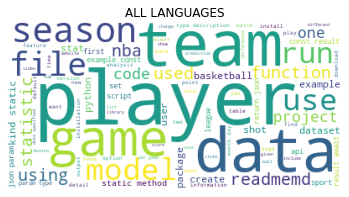

In [92]:
img = WordCloud(background_color='white')\
    .generate(all_.words)

plt.imshow(img)
plt.axis('off')
plt.title(all_.label.upper())
plt.show()

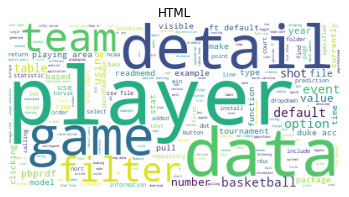

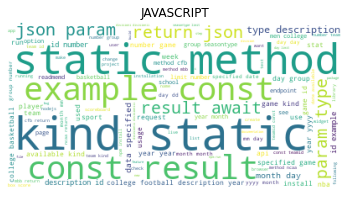

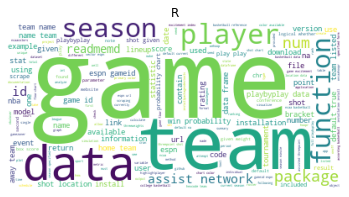

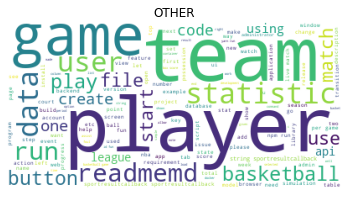

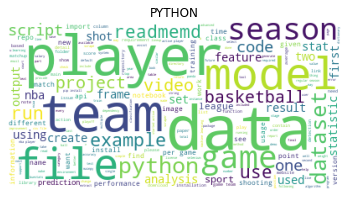

In [76]:
# iterates over the languages and creates a word cloud for each one 
for language in languages:
    
    #the words themselves can be accessed with dot notation on the object. same with the label
    img = WordCloud(background_color='white')\
        .generate(language.words)

    plt.imshow(img)
    plt.axis('off')
    plt.title(language.label.upper())
    plt.show()
    
    



 Visualize them with a word cloud. How do they compare with the ham bigrams?


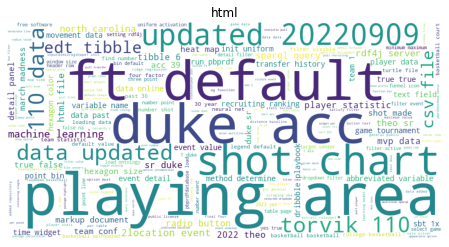

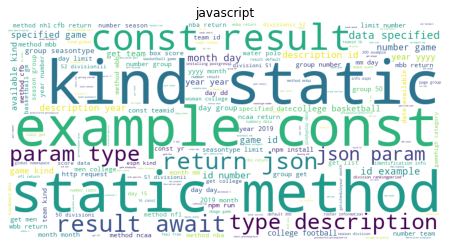

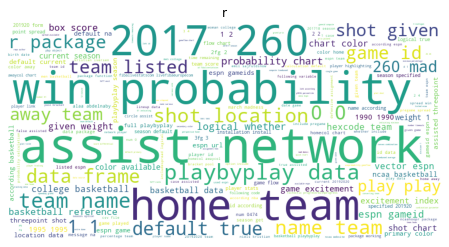

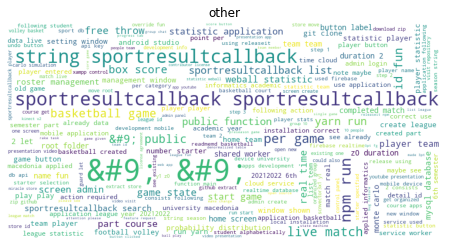

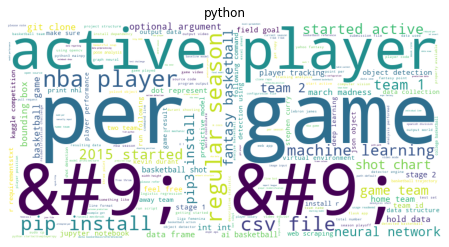

In [77]:
for language in languages:
    data = {' '.join(k): v for k, v in language.bigrams()
                                        .value_counts()
                                        .to_dict()
                                        .items()}
    img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
    plt.figure(figsize=(8, 4))
    plt.imshow(img)
    plt.axis('off')
    plt.title(language.label)
    plt.show()

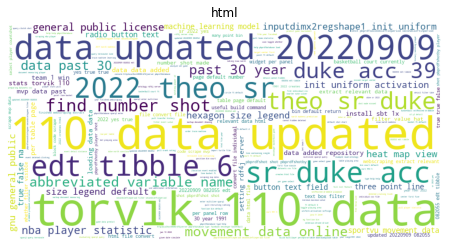

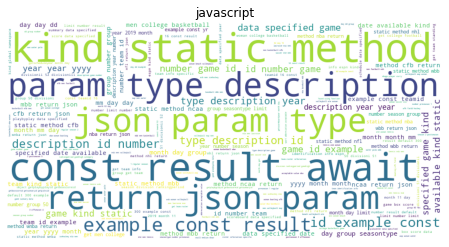

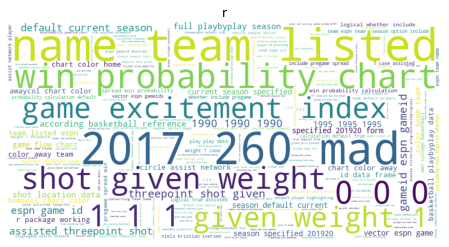

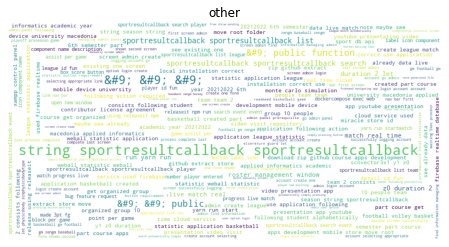

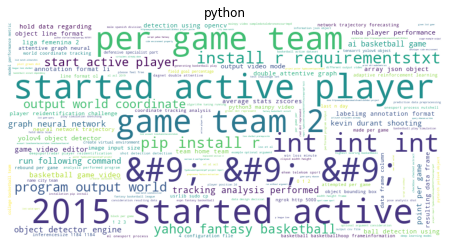

In [78]:
for language in languages:
    data = {' '.join(k): v for k, v in language.trigrams()
                                        .value_counts()
                                        .to_dict()
                                        .items()}
    img = WordCloud(background_color='white', width=800, height=400).generate_from_frequencies(data)
    plt.figure(figsize=(8, 4))
    plt.imshow(img)
    plt.axis('off')
    plt.title(language.label)
    plt.show()

## Calculations for Slide Deck

In [79]:
html.word_counts()

data                           73
player                         53
team                           53
detail                         50
default                        48
                               ..
chat                            1
hate                            1
instead                         1
double                          1
httpswwwansongbasketballcom     1
Length: 1941, dtype: int64

In [80]:
html.whole_words().unique()

array(['documentation', 'contributor', 'readmemd', ..., 'ansong',
       'trainer', 'httpswwwansongbasketballcom'], dtype=object)

In [97]:
len(df)

179

In [96]:
len(all_.whole_words())/len(df)

275.94972067039106

In [99]:
len(all_.whole_words())

49395

## Spotlight - Common Words 
* **Question:** What are the most common words in READMEs?
* **Answer:** (Word with # of appearances)
    - Team: 670
    - Game: 629
    - Data: 622
    - Player: 526
    - Basketball: 364

#### Statistical Hypothesis
>* ${H_0}$: There is no relationship between industry of typical employment and employment status   
>* ${H_a}$: There is a relationship between industry of typical employment and employment status  
>* ${\alpha}$: .05  
>* Result: There is enough evidence to reject our null hypothesis. **Test code below**

In [102]:
all_.whole_words().value_counts().head()

team          670
game          629
data          622
player        526
basketball    364
dtype: int64

In [83]:
#calls function to display visuals and results of statistical analysis and testing
#model.spotlight_stats(train, 'industry', 'Leisure and Hospitality with largest change')

1	Agriculture, forestry, fishing, and hunting		
	
2	Mining		

3	Construction  	

4	Manufacturing  			

5	Wholesale and retail trade	  

6	Transportation and utilities	 

7	Information	  			

8	Financial activities	  	

9	Professional and business services	  	

10	Educational and health services		

11	Leisure and hospitality	  		

12	Other services		  			

13	Public administration	  		
					
14	Armed Forces  

## Spotlight - README Length
* **Question:** Does the length of the README vary by programming language?

* **Answer:** Indivduals identifying as White show the largest population proportion change with a drop of nearly 10% when comparing employed vs unemployed. Those identifying as mixed race other than with white, and Indigenous have the highest unemployed rates at 12% and 7% respectively. 

#### Statistical Hypothesis
>* ${H_0}$: There is no relationship between `race` and `employment` status   
>* ${H_a}$: There is a relationship between `race` and `employment` status   
>* ${\alpha}$: .05  
>* Result: There is enough evidence to reject our null hypothesis. **Test code below**

In [84]:
all_.whole_words().count()/df.word_count.count()

275.94972067039106

In [85]:
for language in languages:
    print(language.label + ': ' + f'{language.whole_words().count()/language.readme_count()}')

html: 388.3076923076923
javascript: 413.7
r: 316.13793103448273
other: 198.36363636363637
python: 249.0


In [86]:
#calls function to display visuals and results of statistical analysis and testing
#model.spotlight_stats(train, 'race', 'White with largest change')

## Spotlight - Unique Words
* **Question:** Do different programming languages use a different number of unique words?
 
* **Answer:** 

#### Statistical Hypothesis
>* ${H_0}$: There is no relationship between having a `professional_certification` and `employment`  
>* ${H_a}$: There is a relationship between having a `professional_certification` and `employment`    
>* ${\alpha}$: .05
>* Result: There is enough evidence to reject our null hypothesis. **Test code below**

In [87]:
for language in languages:
    print(language.label + ': ' + f'{language.whole_words().nunique()}')

html: 1941
javascript: 1714
r: 2622
other: 2488
python: 4454


In [88]:
#calls function to display visuals and results of statistical analysis and testing
#model.spotlight_stats(train, 'professional_certification', 'Better to have certification')

## Spotlight - Language ID by Word
* **Question:** Are there any words that uniquely identify a programming language?
 
* **Answer:** 

#### Statistical Hypothesis
>* ${H_0}$: There is no relationship between having a `professional_certification` and `employment`  
>* ${H_a}$: There is a relationship between having a `professional_certification` and `employment`    
>* ${\alpha}$: .05
>* Result: There is enough evidence to reject our null hypothesis. **Test code below**

In [89]:
#calls function to display visuals and results of statistical analysis and testing
#model.spotlight_stats(train, 'professional_certification', 'Better to have certification')

In [90]:
print('Words Unique to Language')
for language in languages:
    print(f'{language.label}: {len(language.unique_to_language)}')

Words Unique to Language
html: 844
javascript: 677
r: 1454
other: 1074
python: 2701
